# This Article will do exerse for iris_data with 3 method.

In [1]:
# import common
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import mglearn


D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# get data
iris = load_iris()
X, y = iris.data, iris.target
print('Shape', X.shape, y.shape)
RANDOM_STATE = 2

Shape (150, 4) (150,)


As we all kown, the input of this dataset has 4 dimemsions, for vision the dataset, we select 2 main dimension to visual.

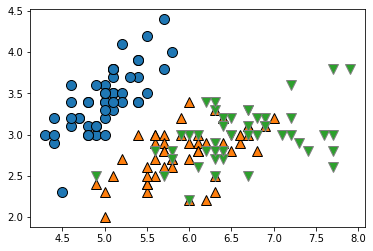

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

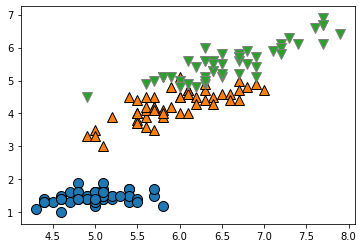

In [4]:
mglearn.discrete_scatter(X[:, 0], X[:, 2], y)

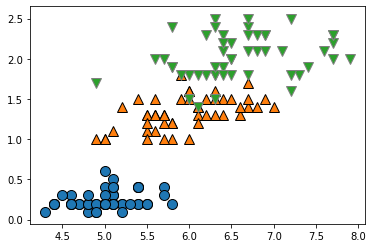

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 3], y)

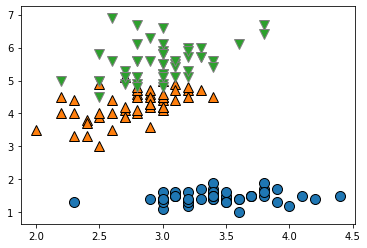

In [6]:
mglearn.discrete_scatter(X[:, 1], X[:, 2], y)

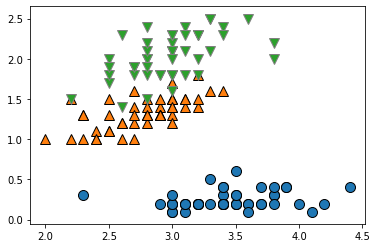

In [7]:
mglearn.discrete_scatter(X[:, 1], X[:, 3], y)

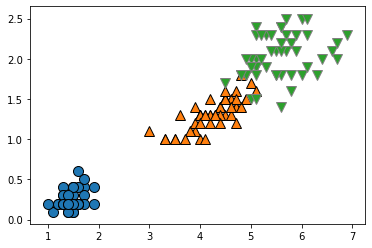

In [8]:
mglearn.discrete_scatter(X[:, 2], X[:, 3], y)

So we just use dimension 2th and dimension 3th for visual dataset.

In [9]:
def eval_on_show(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred):
    f = plt.figure('train set', figsize=(10, 5))
    plt.subplot(121)
    plt.title('train set ture')
    mglearn.discrete_scatter(X_train[:, 2], X_train[:, 3], y_train)
    plt.subplot(122)
    plt.title('train set predict')
    mglearn.discrete_scatter(X_train[:, 2], X_train[:, 3], y_train_pred)

    f = plt.figure('test set', figsize=(10, 5))
    plt.subplot(121)
    plt.title('test set ture')
    mglearn.discrete_scatter(X_test[:, 2], X_test[:, 3], y_test)
    plt.subplot(122)
    plt.title('test set predict')
    mglearn.discrete_scatter(X_test[:, 2], X_test[:, 3], y_test_pred)

## The classification method

In [10]:
# import common
from sklearn.neighbors import KNeighborsClassifier

train score: 0.9583333333333334
test score: 1.0


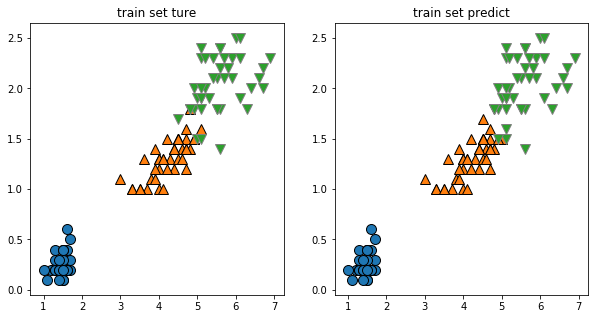

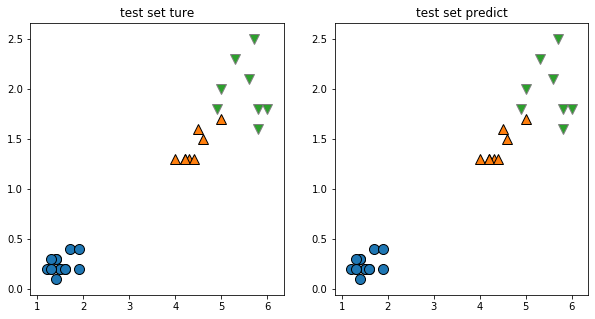

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('train score:', accuracy_score(y_train, y_train_pred))
print('test score:', accuracy_score(y_test, y_test_pred))

eval_on_show(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)

## 1st NeuralNetwork Method
This Method use sklearn's neural_network to classify the data set.

In [12]:
# import common
from sklearn.neural_network import MLPClassifier

train score: 0.975
test score: 1.0


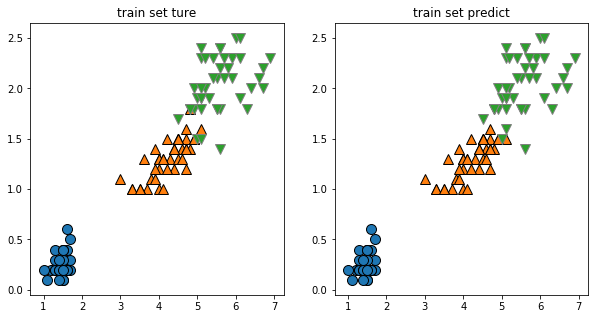

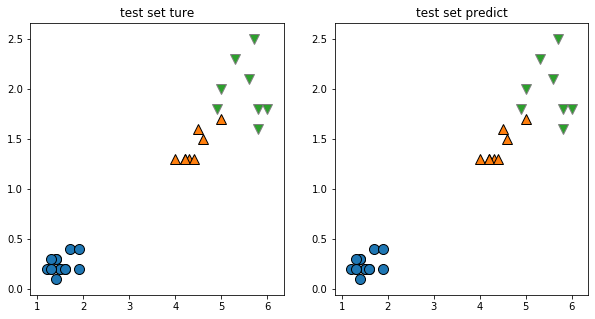

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
print('train score:', accuracy_score(y_train, y_train_pred))
print('test score:', accuracy_score(y_test, y_test_pred))

eval_on_show(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)

## 2nd NeuralNetwork Method
This Method use keras to build a neural_network to classify the data set.

In [14]:
# import common
import keras
from keras.layers import Dense, Activation
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

train score: 0.9833333333333333
test score: 1.0


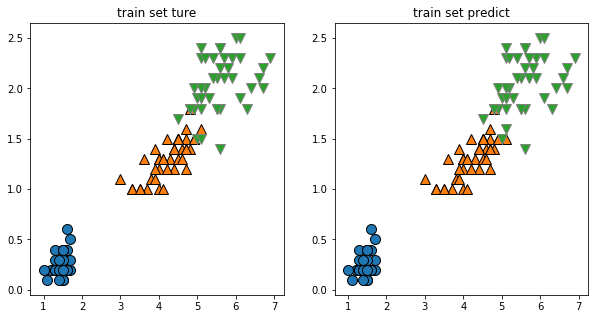

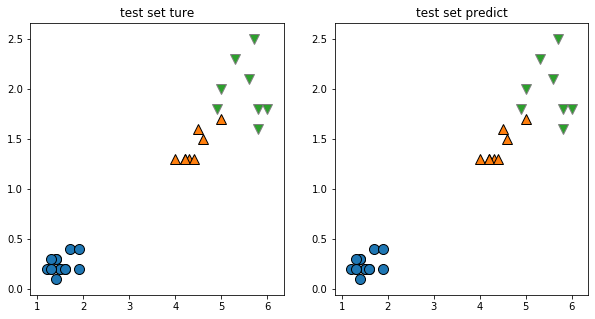

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1], )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(y_train_c.shape[1]))
model.add(Activation('softmax'))
model.compile(Adam(), categorical_crossentropy, ['accuracy'])

model.fit(X_train, y_train_c, batch_size=200, epochs=5000, verbose=0)
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)
print('train score:', accuracy_score(y_train, y_train_pred))
print('test score:', accuracy_score(y_test, y_test_pred))

eval_on_show(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)

## 3rd NeuralNetwork Method
This Method use tensorflow to build a neural_network to classify the data set.

In [16]:
# import common
import tensorflow as tf
from keras.utils import to_categorical

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

INPUT_NODE = 4
OUTPUT_NODE = 3
LAYER1_NODE = 10 # 20 wrose
LAYER2_NODE = 10 # 20 wrose

(?, 3) (?, 3)
After 0 train loss is 1.0976234674453735
Accuracy 0.26666666666666666
After 500 train loss is 1.0871821641921997
Accuracy 0.26666666666666666
After 1000 train loss is 1.048463225364685
Accuracy 0.26666666666666666
After 1500 train loss is 0.9719091057777405
Accuracy 0.7333333333333333
After 2000 train loss is 0.867594301700592
Accuracy 0.7333333333333333
After 2500 train loss is 0.7675849199295044
Accuracy 0.9333333333333333
After 3000 train loss is 0.6780787706375122
Accuracy 1.0
After 3500 train loss is 0.630896270275116
Accuracy 1.0
After 4000 train loss is 0.6117016673088074
Accuracy 1.0
After 4500 train loss is 0.6022022366523743
Accuracy 1.0
train score: 0.975
test score: 1.0


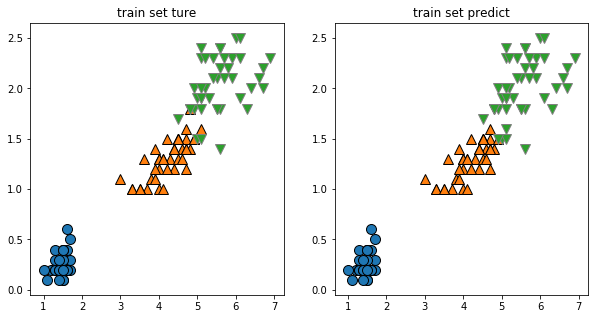

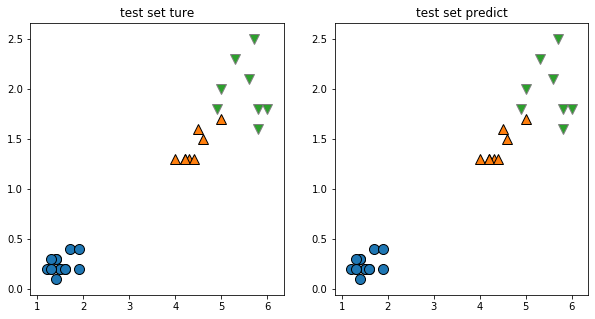

In [18]:
tf.reset_default_graph()
def front_inference(input_tensor):
    weights1 = tf.get_variable('weights1', shape=[INPUT_NODE, LAYER1_NODE], initializer=tf.truncated_normal_initializer(stddev=0.1))
    biases1 = tf.get_variable('biases1', [LAYER1_NODE], initializer=tf.constant_initializer(0.0))
    layer1 = tf.nn.relu(tf.matmul(input_tensor, weights1) + biases1)
    weights2 = tf.get_variable('weights2', shape=[LAYER1_NODE, LAYER2_NODE], initializer=tf.truncated_normal_initializer(stddev=0.1))
    biases2 = tf.get_variable('biases2', [LAYER2_NODE], initializer=tf.constant_initializer(0.0))
    layer2 = tf.nn.relu(tf.matmul(layer1, weights2) + biases2)
    weights3 = tf.get_variable('weights3', shape=[LAYER2_NODE, OUTPUT_NODE], initializer=tf.truncated_normal_initializer(stddev=0.1))
    biases3 = tf.get_variable('biases3', [OUTPUT_NODE], initializer=tf.constant_initializer(0.0))
    layeroutput = tf.nn.softmax(tf.matmul(layer2, weights3) + biases3)
    return layeroutput

TRAINING_TIMES = 5000
BATCH_SIZE = 100
LEARNING_RATE = 0.01
def train():
    global y_train_pred, y_test_pred
    X_input = tf.placeholder(tf.float32, shape=[None, INPUT_NODE], name='X_input')
    Y_output = tf.placeholder(tf.float32, shape=[None, OUTPUT_NODE], name='Y_output')
    y_output_pred = front_inference(X_input)
    print(Y_output.shape, y_output_pred.shape)
    
    entroy_cross = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf.argmax(Y_output, 1), logits=y_output_pred)
    loss = tf.reduce_mean(entroy_cross)
    
    train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    
    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        for i in range(TRAINING_TIMES):
            _, loss_train = sess.run([train_op, loss], feed_dict={X_input: X_train, Y_output: y_train_c})
            if i % 500 == 0:
                print('After {} train loss is {}'.format(i, loss_train))
                prob = sess.run(y_output_pred, feed_dict={X_input: X_test})
                pred_class = sess.run(tf.argmax(prob, 1))
                print('Accuracy', accuracy_score(pred_class, y_test))
#                 print(pred_class.reshape(-1, 1))
#                 correct_prediction = tf.equal(tf.argmax(prob, 1), tf.argmax(y_test_c))
#                 print(correct_prediction)
        # end calculate
        y_train_pred = sess.run(y_output_pred, feed_dict={X_input: X_train})
        y_train_pred = sess.run(tf.argmax(y_train_pred, 1))
        y_test_pred = sess.run(y_output_pred, feed_dict={X_input: X_test})
        y_test_pred = sess.run(tf.argmax(y_test_pred, 1))

y_train_pred = None
y_test_pred = None
train()

print('train score:', accuracy_score(y_train, y_train_pred))
print('test score:', accuracy_score(y_test, y_test_pred))

eval_on_show(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)